In [189]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [190]:
# Read data from CSV and remove unnecessary columns
cna15 = pd.read_csv('../data/CNA15-PopPerYearByAgeGroup.csv')
cna15.drop(columns=['Sex', 'Statistic', 'UNIT'], inplace=True)
cna15.head()

# We will need separate models for each age group
age_groups = np.array(['Under 1 year', '1 - 4 years', '5 - 9 years', '10 - 14 years', '15 - 19 years', '20 - 24 years', '25 - 29 years', '30 - 34 years', '35 - 39 years', '40 - 44 years', '45 - 49 years', '50 - 54 years', '55 - 59 years', '60 - 64 years', '65 - 69 years', '70 - 74 years', '75 - 79 years', '80 - 84 years', '85 years and over'])
models = {}

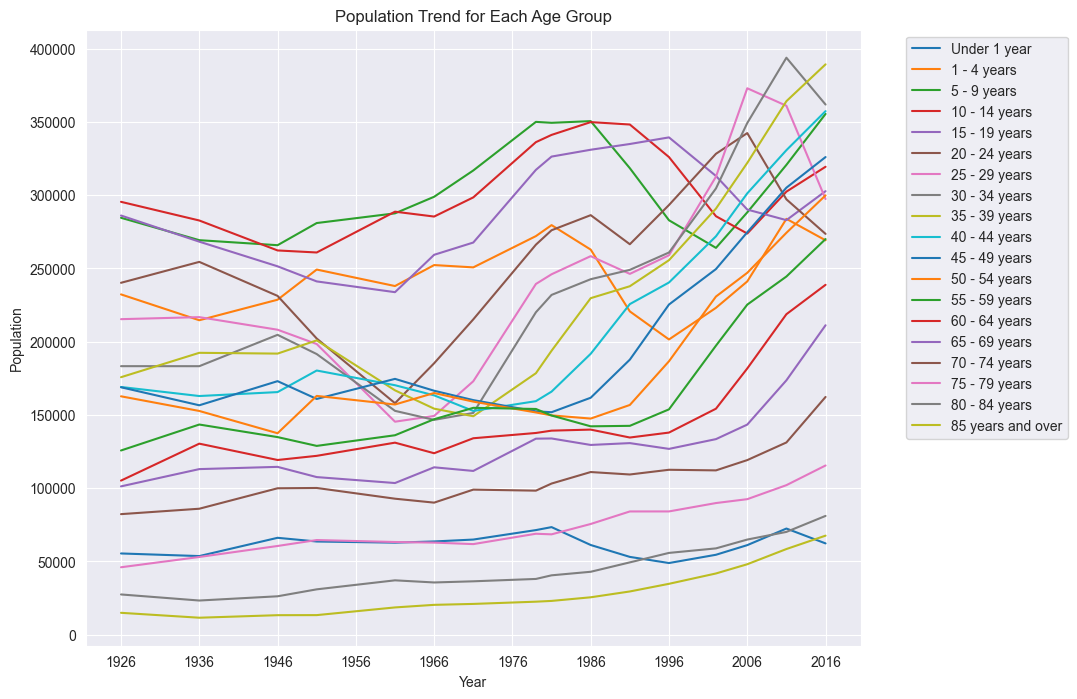

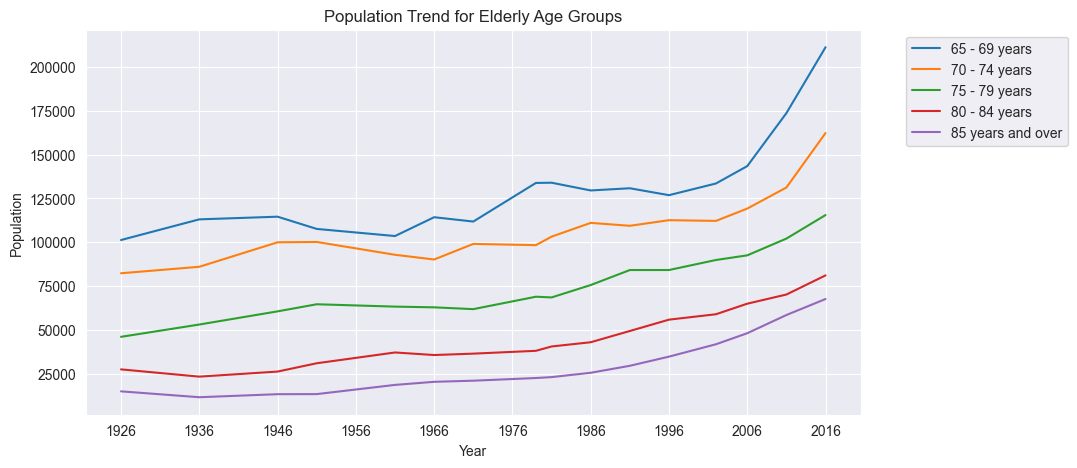

In [191]:
# Data Visualisation

# Visualising population trend for each age group
plt.figure(figsize=(10, 8))

# Plotting each age group's population
for ag in age_groups:
    plt.plot(cna15['Year'], cna15[ag], label=ag)

# Custom tick labels to show every 10th year
x_ticks = [1926, 1936, 1946, 1956, 1966, 1976, 1986, 1996, 2006, 2016]
plt.xticks(x_ticks)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trend for Each Age Group')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Visualising population trend for elderly age groups
plt.figure(figsize=(10, 5))

for ag in age_groups[-5:]:
    plt.plot(cna15['Year'], cna15[ag], label=ag)
    
plt.xticks(x_ticks)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trend for Elderly Age Groups')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [192]:
from sklearn.model_selection import train_test_split

# To be used in evaluation
r_squareds = []
rmses = []
best_lags = {}

lag_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Fit each model with a corresponding age group and record results
for ag in age_groups:
    best_r_squared = -np.inf
    best_rmse = float("inf")
    best_lag = None
    best_model = None
    
    X = cna15[['Year']]
    y = cna15[ag]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    for lag in lag_values:
        X_train_lagged = X_train[-lag:]
        y_train_lagged = y_train[-lag:]
        
        model = LinearRegression()
        model.fit(X_train_lagged, y_train_lagged)
        
        r_squared = model.score(X_test, y_test)
        y_pred = model.predict(X_test)
        rmse = root_mean_squared_error(y_test, y_pred)
        
        if rmse < best_rmse:
            best_r_squared = r_squared
            best_rmse = rmse
            best_lag = lag
            best_model = model
        
    r_squareds.append(best_r_squared)
    rmses.append(best_rmse)
    best_lags[ag] = best_lag
    models[ag] = best_model

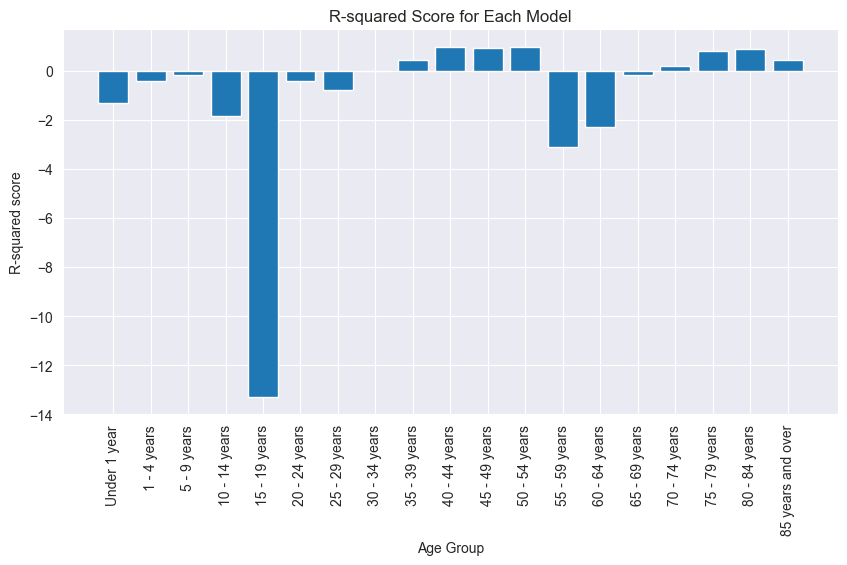

Average r-squared score: -0.9634580291660639
Average r-squared score for elderly populations: 0.41964796689555783


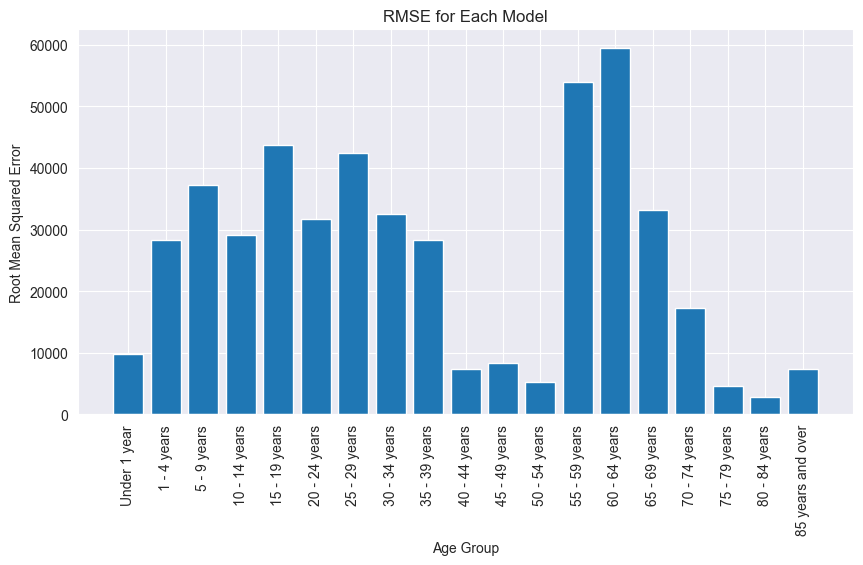

Average RMSE: 25409.4
Average RMSE for elderly populations: 13059.57


In [193]:
# Visualising each model's performance
# R squared scores
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(age_groups)), r_squareds)
plt.title('R-squared Score for Each Model')
plt.ylabel('R-squared score')
plt.xlabel('Age Group')
plt.xticks(ticks=np.arange(len(age_groups)), labels=age_groups, rotation=90)
plt.show()

avg_r_score = sum(r_squareds) / len(r_squareds)
print('Average r-squared score:', avg_r_score)

avg_r_score = sum(r_squareds[-5:]) / 5
print('Average r-squared score for elderly populations:', avg_r_score)

# Root mean squared error (RMSE)
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(age_groups)), rmses)
plt.title('RMSE for Each Model')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Age Group')
plt.xticks(ticks=np.arange(len(age_groups)), labels=age_groups, rotation=90)
plt.show()

avg_rmse = round(sum(rmses) / len(rmses), 2)
print('Average RMSE:', avg_rmse)

avg_rmse = round(sum(rmses[-5:]) / 5, 2)
print('Average RMSE for elderly populations:', avg_rmse)

8


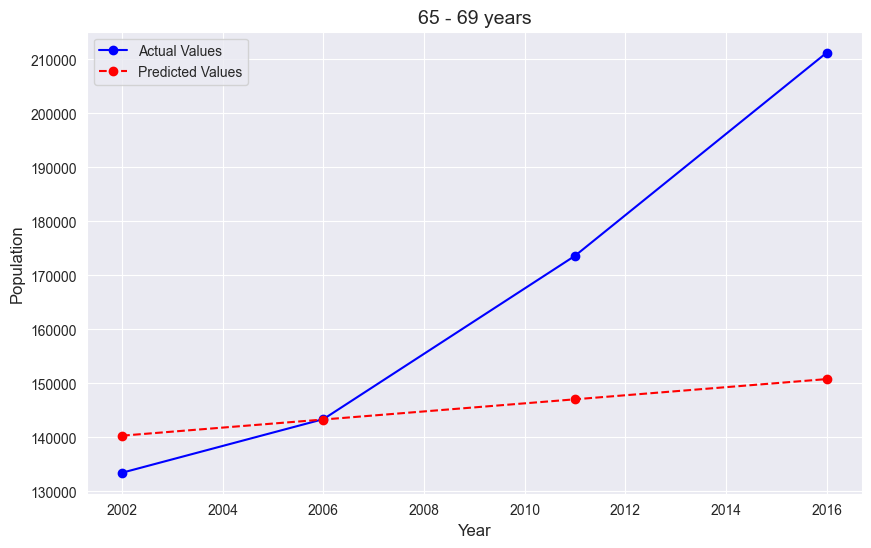

5


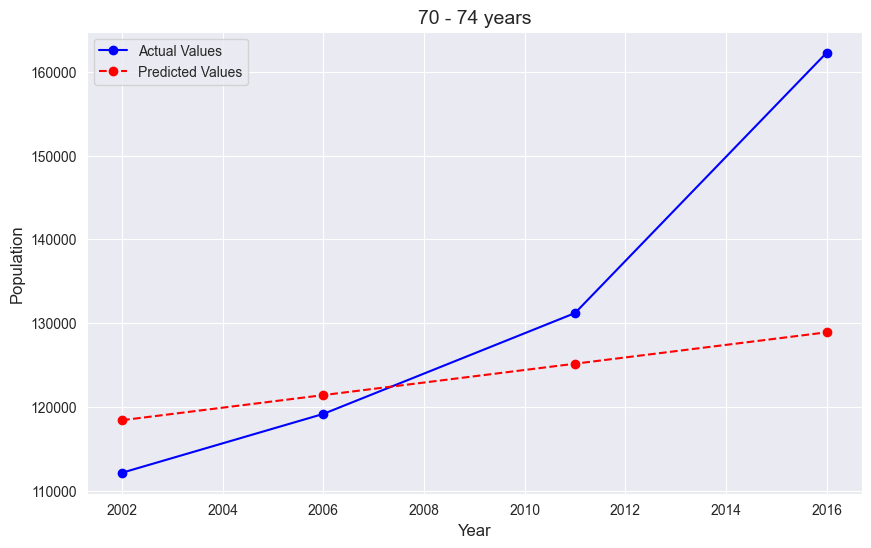

4


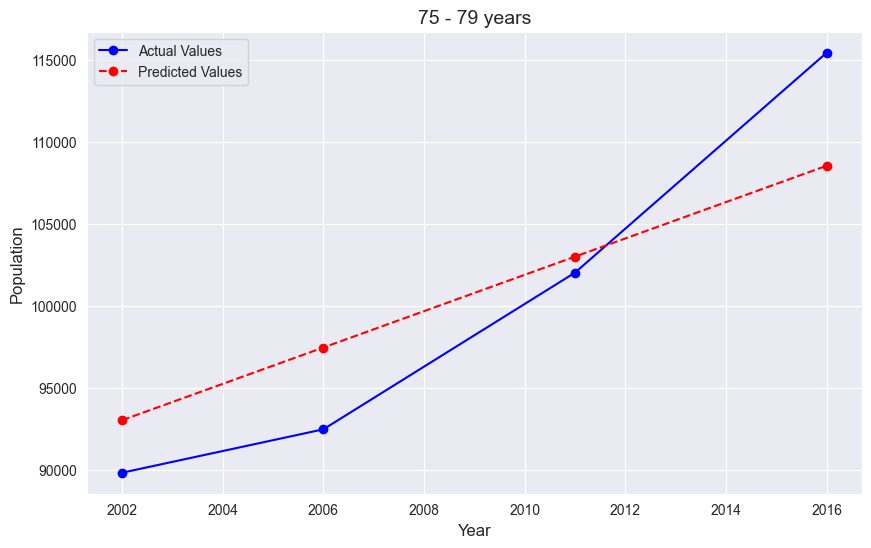

4


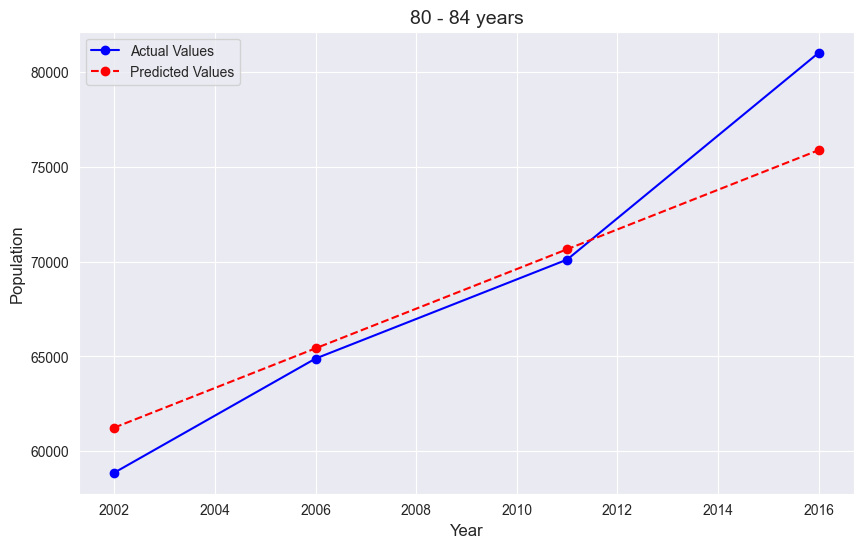

2


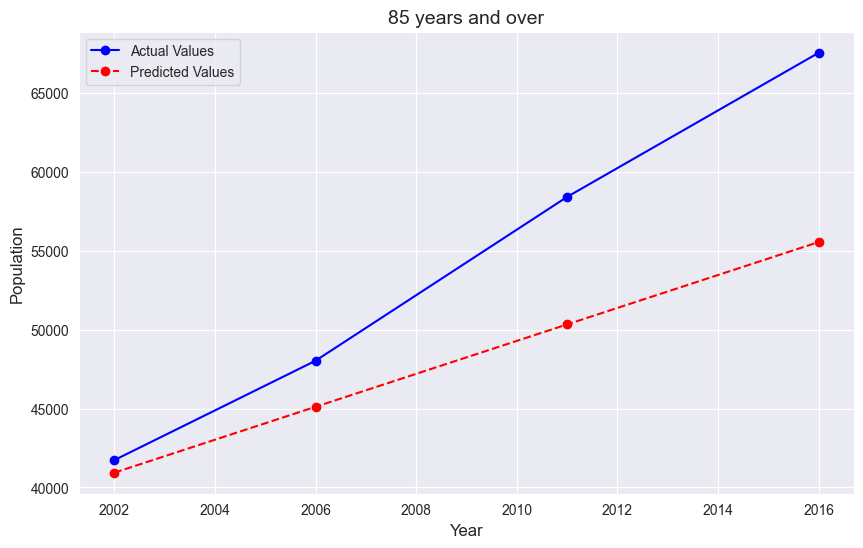

In [199]:
for ag in age_groups[-5:]:
    lag = best_lags[ag]
    print(lag)
            
    X = cna15[['Year']]
    y = cna15[ag]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    y_pred_best = models[ag].predict(X_test)
    
    temp = [2002, 2006, 2011, 2016]
    
    plt.figure(figsize=(10, 6))
    plt.plot(temp, y_test, label='Actual Values', color='blue', linestyle='-', marker='o')
    plt.plot(temp, y_pred_best, label='Predicted Values', color='red', linestyle='--', marker='o')
    
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Population', fontsize=12)  # You can customize this to the actual variable you're predicting
    plt.title(ag, fontsize=14)
    
    plt.legend()
    plt.grid(True)
    plt.show()

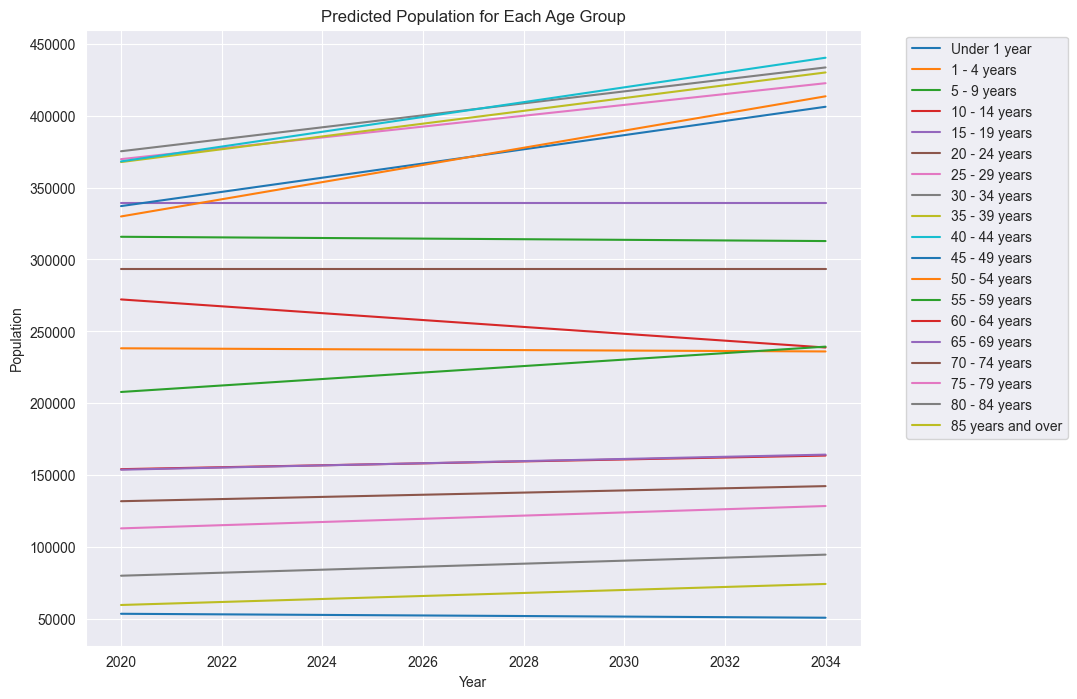

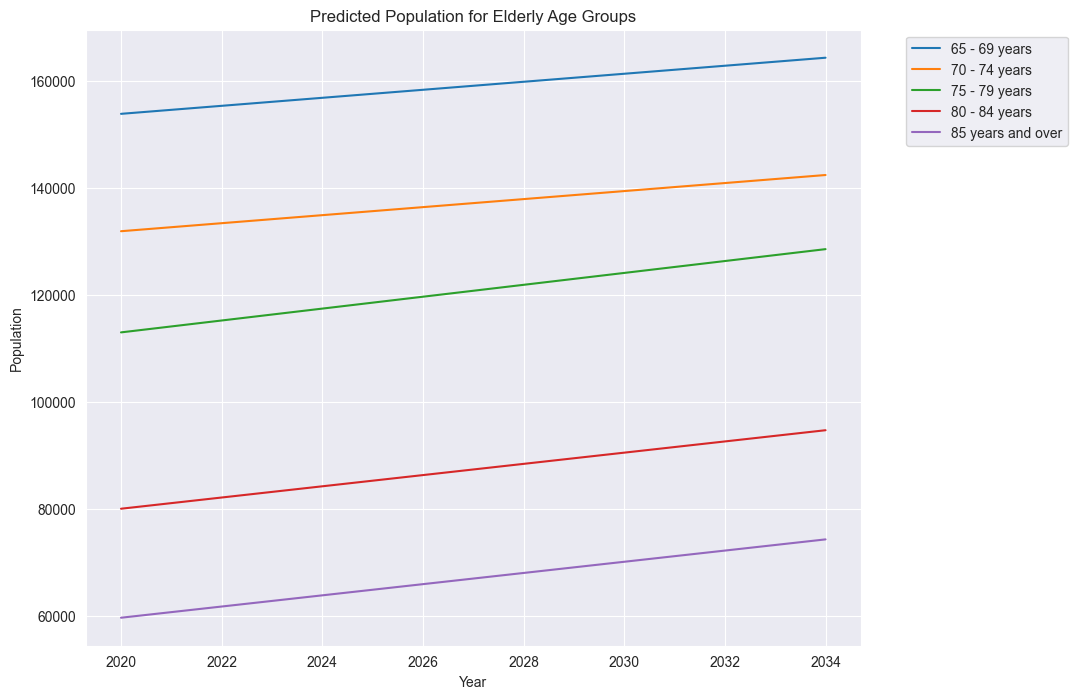

In [196]:
# Predicting future population using each age group's model
years_to_predict = pd.DataFrame({'Year': [2020, 2022, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034]})
predictions = {}

for ag in age_groups:
    predictions[ag] = models[ag].predict(years_to_predict)

# Predicted population change for each age group
plt.figure(figsize=(10, 8))

for ag in age_groups:
    plt.plot(years_to_predict['Year'], predictions[ag], label=ag)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Predicted Population for Each Age Group')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Predicted population change for elderly age groups
plt.figure(figsize=(10, 8))

for ag in age_groups[-5:]:
    plt.plot(years_to_predict['Year'], predictions[ag], label=ag)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Predicted Population for Elderly Age Groups')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

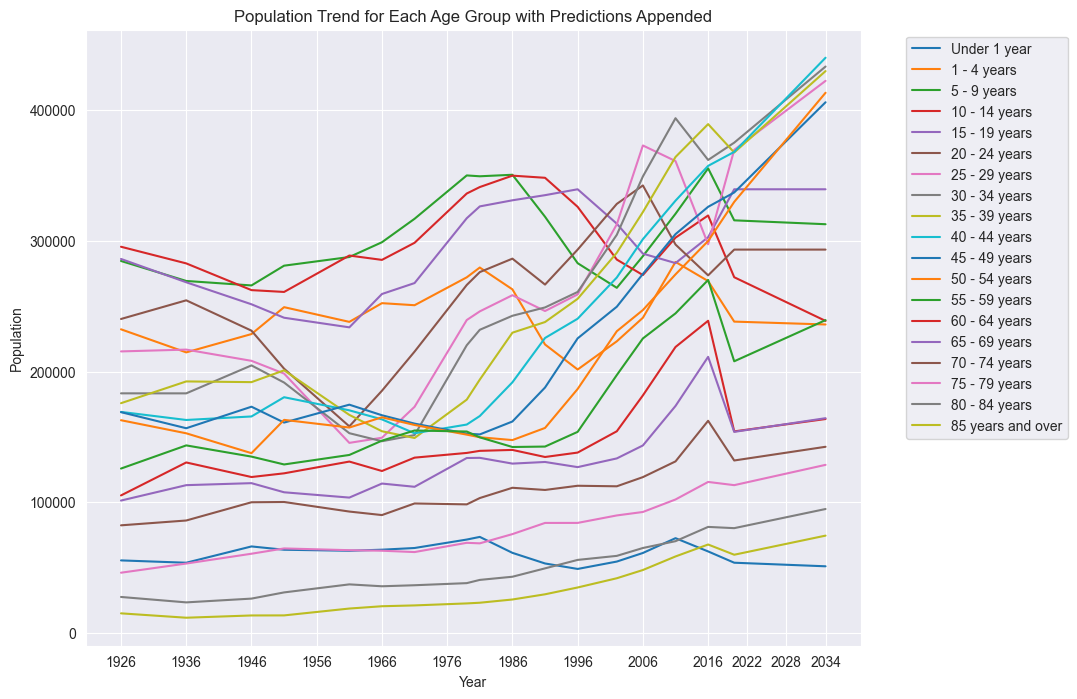

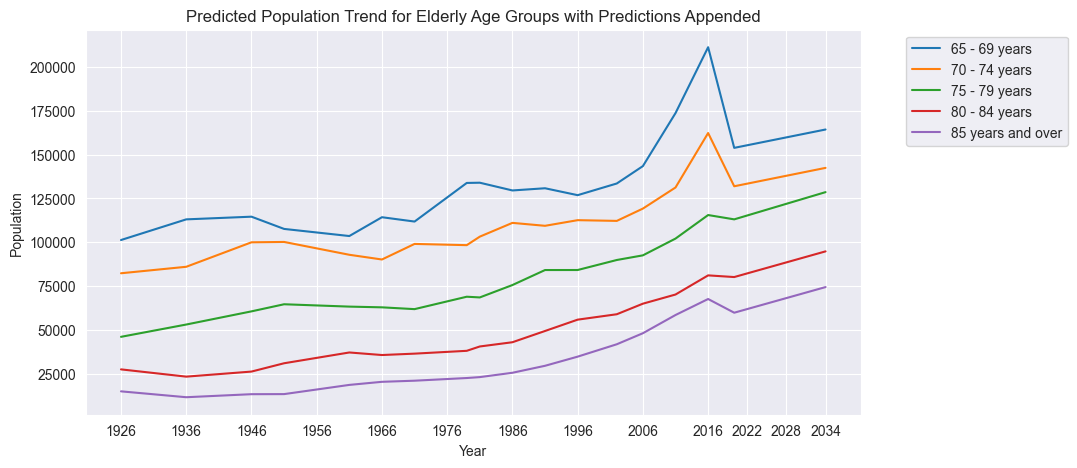

In [197]:
# Appending predictions to the original data
predictions_df = pd.DataFrame(predictions, index=years_to_predict['Year'])
predictions_df.reset_index(inplace=True)
cna15_with_preds = pd.concat([cna15, predictions_df], ignore_index=True)

# Visualising data with predictions appended
x_ticks += [2022, 2028, 2034]

# Every age group
plt.figure(figsize=(10, 8))

for ag in age_groups:
    plt.plot(cna15_with_preds['Year'], cna15_with_preds[ag], label=ag)

plt.xticks(x_ticks)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trend for Each Age Group with Predictions Appended')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Elderly age groups
plt.figure(figsize=(10, 5))

for ag in age_groups[-5:]:
    plt.plot(cna15_with_preds['Year'], cna15_with_preds[ag], label=ag)

plt.xticks(x_ticks)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Predicted Population Trend for Elderly Age Groups with Predictions Appended')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

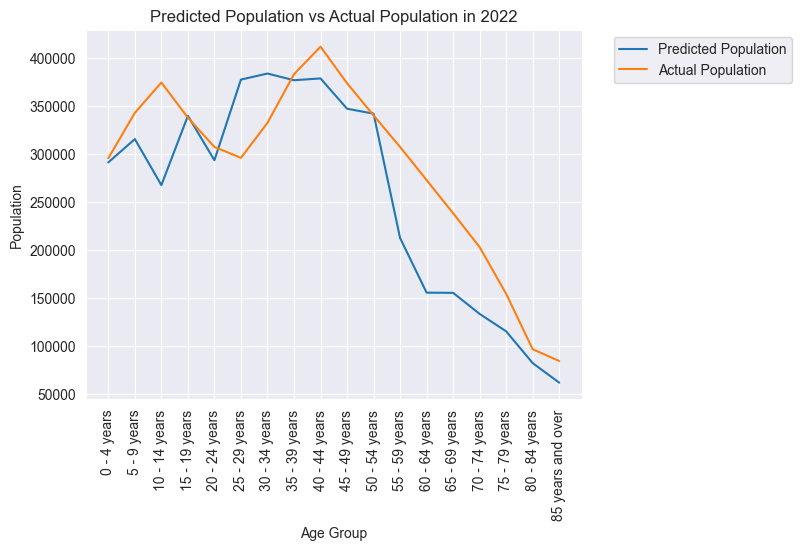

In [198]:
# Comparing 2022 predicted populations against actual populations

# Getting predictions for 2022
# We also have to change the columns slightly to match the data we have for 2022
predictions_2022 = predictions_df[predictions_df['Year'] == 2022]
predictions_2022.loc[1, '1 - 4 years'] += predictions_2022.loc[1, 'Under 1 year']
predictions_2022 = predictions_2022.rename(columns={'1 - 4 years': '0 - 4 years'}, inplace=False)
predictions_2022.drop(columns=['Year', 'Under 1 year'], inplace=True)
predictions_2022.head()

# Getting actual values for 2022
actual_2022 = pd.read_csv('../data/2022PopByAgeGroup.csv')
actual_2022.drop(columns=['Statistic', 'CensusYear'], inplace=True)
actual_2022.head()

# Plotting actual vs predicted against each other
plt.plot(predictions_2022.columns, predictions_2022.iloc[0], label='Predicted Population')
plt.plot(actual_2022.columns, actual_2022.iloc[0], label='Actual Population')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Predicted Population vs Actual Population in 2022')
plt.xticks(rotation=90)
plt.xlabel('Age Group')
plt.ylabel('Population')
plt.show()